-------------------
#### cdist from nltk

- `ConditionalFreqDist` (often abbreviated as cfdist or cfd) from the nltk.probability module is used to count the frequencies of pairs. 

- When these pairs involve a condition and an event, ConditionalFreqDist gives you the frequency of each event given the condition.

- A typical use case is in Natural Language Processing where you want to count word frequencies given the context or some preceding word.

In [1]:
import nltk
from nltk.probability import ConditionalFreqDist
from nltk.corpus import brown

#### Example with Bigrams:
- Let's say you're interested in finding the frequencies of words that come after the word "the" in the 'news' category of the Brown corpus:

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bhupe\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [9]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [10]:
len(brown.words(categories='news'))

100554

In [12]:
print(brown.words(categories='news')[:200])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [3]:
# Generate bigrams
bigrams = list(nltk.bigrams(brown.words(categories='news')))

In [14]:
# Use ConditionalFreqDist
cfd = ConditionalFreqDist(bigrams)

`Accessing Specific Frequencies`
- access specific frequencies within the CFD object using square bracket notation. 
- For example, `cfd[condition][sample]` retrieves the frequency of sample given condition.

In [17]:
cfd['the']['United']

46

In [18]:
# Most common words after 'the'
cfd['the'].most_common(15)

[('first', 70),
 ('United', 46),
 ('state', 45),
 ('``', 35),
 ('same', 33),
 ('U.S.', 30),
 ('new', 29),
 ('President', 29),
 ('other', 29),
 ('Congo', 29),
 ('American', 28),
 ('last', 26),
 ('city', 23),
 ('House', 23),
 ('past', 23)]

#### Visualization:
You can also visualize the results. For instance, let's see the most common words following "can" and "may":

In [16]:
import matplotlib.pyplot as plt

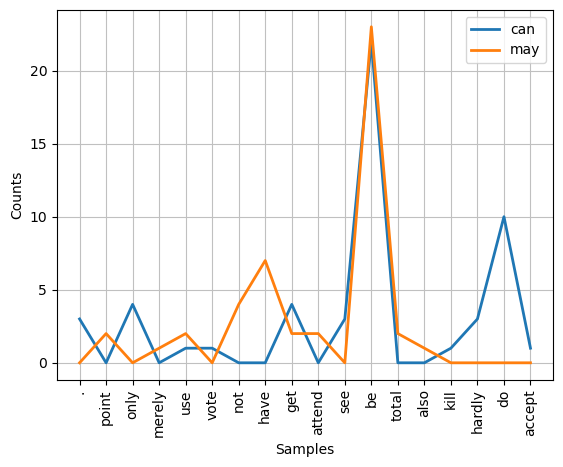

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
# Extracting top words after 'can' and 'may' for the plot samples
samples_can = [word for word, freq in cfd['can'].most_common(10)]
samples_may = [word for word, freq in cfd['may'].most_common(10)]
combined_samples = list(set(samples_can + samples_may))

# Plotting
cfd.plot(conditions=['can', 'may'], samples=combined_samples)

#### Example

A Conditional Frequency is a collection of frequency distributions, computed based on a condition. 

For computing a conditional frequency, you have to attach a condition to every occurrence of an event. Let's consider the following list for computing Conditional Frequency.

In [26]:
c_items = [('F','apple'), 
           ('F','apple'), 
           ('F','kiwi'), 
           ('V','cabbage'), 
           ('V','cabbage'), 
           ('V','potato') ]

Each item is grouped either as a fruit F or a vegetable V.

In [28]:
cfd = nltk.ConditionalFreqDist(c_items)

In [29]:
cfd.conditions()

['F', 'V']

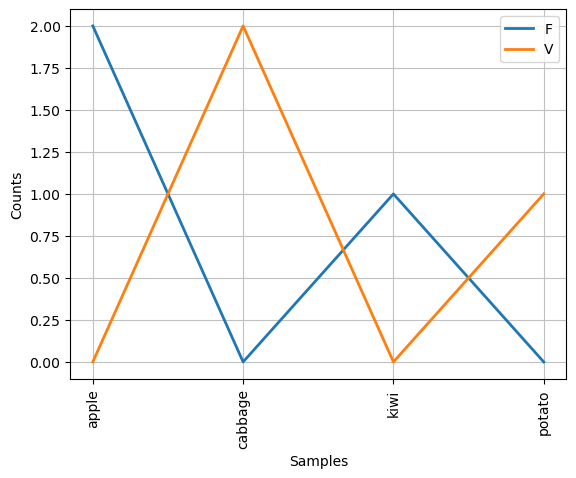

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
cfd.plot()

In [31]:
cfd['V']

FreqDist({'cabbage': 2, 'potato': 1})

#### Example

In [32]:
cfd = nltk.ConditionalFreqDist([ (genre, word) for genre in brown.categories() for word in brown.words(categories=genre) ])

In [33]:
cfd

<ConditionalFreqDist with 15 conditions>

In [34]:
cfd.conditions()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Viewing Word Count

In [35]:
cfd.tabulate(conditions=['government', 'humor', 'reviews'],samples=['leadership', 'worship', 'hardship'])

           leadership    worship   hardship 
government         12          3          2 
     humor          1          0          0 
   reviews         14          1          2 


Accessing Individual Frequency Distributions From the obtained conditional frequency distribution, you can access individual frequency distributions.

In [36]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [37]:
cfd['news'].most_common(10)

[('the', 5580),
 (',', 5188),
 ('.', 4030),
 ('of', 2849),
 ('and', 2146),
 ('to', 2116),
 ('a', 1993),
 ('in', 1893),
 ('for', 943),
 ('The', 806)]